Set up basic imports and explore the dataset structure.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Base directory where the dataset is mounted
base_dir = "/kaggle/input/sicapv2"

# Check directory structure
for root, dirs, files in os.walk(base_dir):
    print(f"{root} -> {len(files)} files")


/kaggle/input/sicapv2 -> 0 files
/kaggle/input/sicapv2/SICAPv2 -> 0 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2 -> 2 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/images -> 18783 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition -> 0 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation -> 0 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val3 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val4 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val2 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val1 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Test -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks -> 18783 files


In [2]:
import os

image_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
print("Files in images dir:", os.listdir(image_dir)[:5])


Files in images dir: ['16B0006669_Block_Region_24_6_2_xini_14275_yini_13598.jpg', '18B0005230E_Block_Region_5_11_23_xini_38257_yini_96363.jpg', '18B0006621D_Block_Region_2_1_13_xini_21582_yini_66086.jpg', '18B0006177A_Block_Region_2_6_19_xini_51693_yini_147491.jpg', '16B0022612_Block_Region_1_20_12_xini_15667_yini_92428.jpg']


Total images found: 18783


TypeError: Image data of dtype object cannot be converted to float

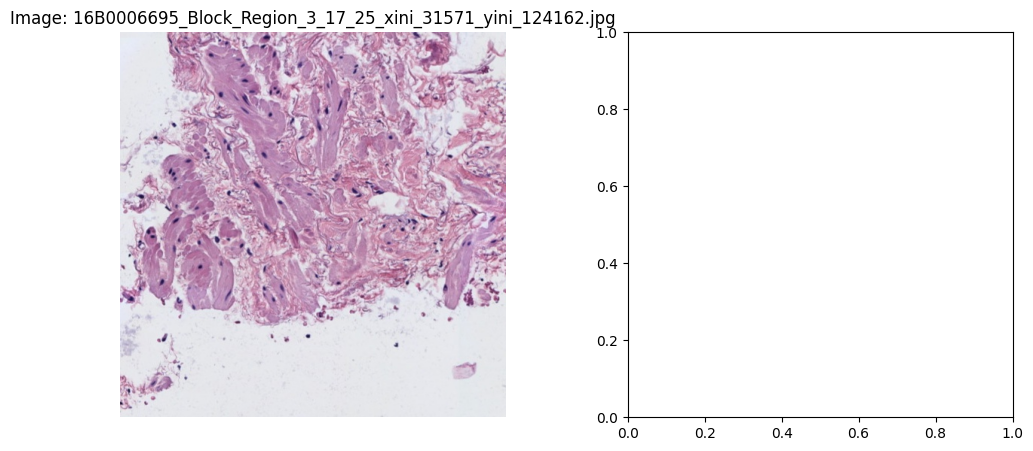

In [3]:
import random
from glob import glob
import cv2
import matplotlib.pyplot as plt
import os

# Correct image and mask paths
image_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
mask_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks"

# Use .jpg extension
image_paths = glob(os.path.join(image_dir, "*.jpg"))
print(f"Total images found: {len(image_paths)}")

# Random sample
sample_image_path = random.choice(image_paths)
filename = os.path.basename(sample_image_path)
sample_mask_path = os.path.join(mask_dir, filename.replace(".jpg", ".png"))  # Masks might be .png

# Load image and mask
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread(sample_mask_path, cv2.IMREAD_GRAYSCALE)

# Display side by side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f"Image: {filename}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='jet')
plt.title("Mask (Labels)")
plt.axis('off')
plt.show()


In [4]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob

# Correct paths
image_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
mask_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks"

# Load all image paths
image_paths = glob(os.path.join(image_dir, "*.jpg"))
print(f"Total images found: {len(image_paths)}")

# Try until we find a pair where mask exists
for _ in range(20):
    sample_image_path = random.choice(image_paths)
    filename = os.path.basename(sample_image_path)
    mask_path = os.path.join(mask_dir, filename.replace(".jpg", ".png"))
    
    if os.path.exists(mask_path):
        print("Found matching mask for:", filename)
        break
else:
    raise FileNotFoundError("No matching masks found for any image.")

# Load image and mask
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Sanity check
print("Image shape:", image.shape)
print("Mask shape:", mask.shape)
print("Unique mask values:", np.unique(mask))

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f"Image: {filename}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='jet')
plt.title("Mask (Labels)")
plt.axis('off')
plt.show()


Total images found: 18783


FileNotFoundError: No matching masks found for any image.

In [5]:
import os

mask_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks"
mask_files = os.listdir(mask_dir)
print(f"Total masks: {len(mask_files)}")
print("Sample mask filenames:", mask_files[:10])


Total masks: 18783
Sample mask filenames: ['16B0006669_Block_Region_24_6_2_xini_14275_yini_13598.jpg', '18B0005230E_Block_Region_5_11_23_xini_38257_yini_96363.jpg', '18B0006621D_Block_Region_2_1_13_xini_21582_yini_66086.jpg', '18B0006177A_Block_Region_2_6_19_xini_51693_yini_147491.jpg', '16B0022612_Block_Region_1_20_12_xini_15667_yini_92428.jpg', '17B0035220_Block_Region_5_22_18_xini_39584_yini_76503.jpg', '16B0022615_Block_Region_4_19_41_xini_44968_yini_22920.jpg', '17B0034247_Block_Region_2_21_7_xini_39052_yini_24363.jpg', '18B0005478I_Block_Region_2_13_11_xini_19020_yini_148142.jpg', '17B0027608_Block_Region_7_16_43_xini_59764_yini_61267.jpg']


Total images found: 18783
✅ Found matching image + mask for: 18B0001071H_Block_Region_1_1_14_xini_34759_yini_77482.jpg
Image shape: (512, 512, 3)
Mask shape: (512, 512)
Unique values in mask: [0]


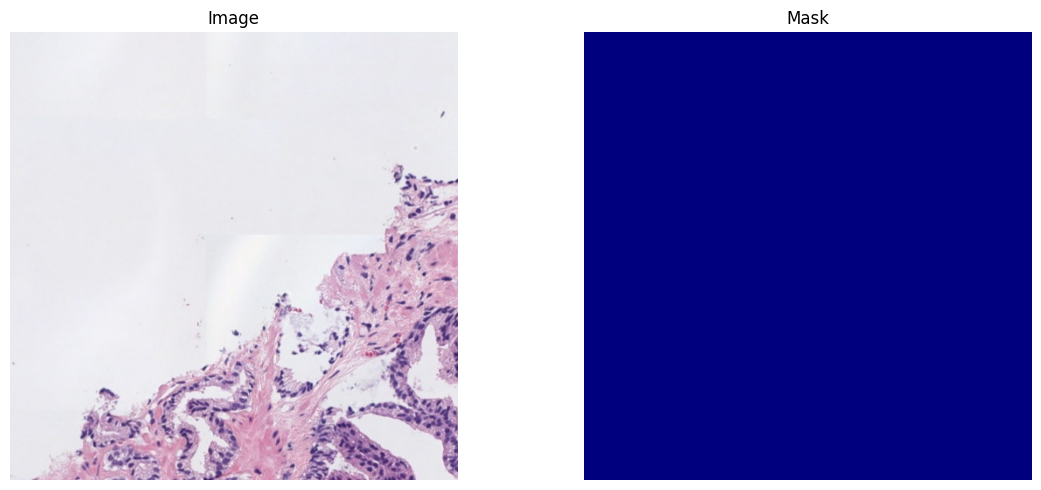

In [6]:
import random
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# Correct image and mask directories
image_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
mask_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks"

# Get list of image files
image_paths = glob(os.path.join(image_dir, "*.jpg"))
print(f"Total images found: {len(image_paths)}")

# Try loading image-mask pair
for _ in range(20):
    sample_image_path = random.choice(image_paths)
    filename = os.path.basename(sample_image_path)
    sample_mask_path = os.path.join(mask_dir, filename)  # No extension change now

    if os.path.exists(sample_mask_path):
        print("✅ Found matching image + mask for:", filename)
        break
else:
    raise FileNotFoundError("No matching masks found for any image.")

# Load image and mask
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread(sample_mask_path, cv2.IMREAD_GRAYSCALE)

# Print some sanity info
print("Image shape:", image.shape)
print("Mask shape:", mask.shape)
print("Unique values in mask:", np.unique(mask))

# Show image and mask
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='jet')
plt.title("Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Path to Excel label file
xlsx_path = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/wsi_labels.xlsx"

# Read Excel
df = pd.read_excel(xlsx_path)

# Your GG logic
def gleason_to_gg(primary, secondary):
    total = primary + secondary
    if total == 7 and primary == 4:
        return "GG3"
    elif total == 8:
        return "GG4"
    elif total >= 9:
        return "GG5"
    else:
        return "NC"

df["GG"] = df.apply(lambda row: gleason_to_gg(row["Gleason_primary"], row["Gleason_secondary"]), axis=1)

print(df.head())
print(df["GG"].value_counts())


     slide_id  patient_id  Gleason_primary  Gleason_secondary   GG
0  16B0001851      667360                4                  5  GG5
1  16B0003388      325687                4                  4  GG4
2  16B0003394      747184                3                  3   NC
3  16B0006668       14107                5                  5  GG5
4  16B0006669       14107                5                  5  GG5
GG
NC     72
GG5    42
GG3    23
GG4    18
Name: count, dtype: int64


In [10]:
from glob import glob
import pandas as pd
import os

# Load GG labels
labels_df = pd.read_excel("/kaggle/input/sicapv2/SICAPv2/SICAPv2/wsi_labels.xlsx")
def gleason_to_gg(primary, secondary):
    total = primary + secondary
    if total == 7 and primary == 4:
        return "GG3"
    elif total == 8:
        return "GG4"
    elif total >= 9:
        return "GG5"
    else:
        return "NC"
labels_df["GG"] = labels_df.apply(lambda row: gleason_to_gg(row["Gleason_primary"], row["Gleason_secondary"]), axis=1)

# Create a dictionary for quick lookup
slideid_to_gg = dict(zip(labels_df["slide_id"].astype(str), labels_df["GG"]))

# Grab all patch image paths
patch_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
patch_paths = glob(os.path.join(patch_dir, "*.jpg"))

# Build dataframe with patch paths and labels
patch_data = []
for path in patch_paths:
    filename = os.path.basename(path)
    slide_id = filename.split("_")[0]
    if slide_id in slideid_to_gg:
        label = slideid_to_gg[slide_id]
        patch_data.append((path, label))

# Create final dataframe
patch_df = pd.DataFrame(patch_data, columns=["path", "label"])
print("Total labeled patches:", len(patch_df))
print(patch_df["label"].value_counts())
patch_df.head()


Total labeled patches: 18783
label
NC     7995
GG5    5654
GG3    3082
GG4    2052
Name: count, dtype: int64


,path,label
0,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG5
1,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,NC
2,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG3
3,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG5
4,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,NC


In [11]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

label_to_idx = {"NC": 0, "GG3": 1, "GG4": 2, "GG5": 3}

class PatchDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "path"]
        label_str = self.df.loc[idx, "label"]
        label = label_to_idx[label_str]

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label


In [12]:
from sklearn.model_selection import train_test_split

# First split: train vs (val + test)
train_df, temp_df = train_test_split(
    patch_df, test_size=0.2, stratify=patch_df["label"], random_state=42)

# Second split: val vs test
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df["label"], random_state=42)

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")


Train: 15026 | Val: 1878 | Test: 1879


PatchDataset class and transform setup


* Use torchvision transforms
* Normalize using ImageNet stats (EffNet is pretrained on ImageNet)
* Resize to 224x224 (EffNet default)


In [13]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

label_to_idx = {"NC": 0, "GG3": 1, "GG4": 2, "GG5": 3}

class PatchDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "path"]
        label_str = self.df.loc[idx, "label"]
        label = label_to_idx[label_str]

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label


define transforms

In [14]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


Create datasets and dataloaders:

In [15]:
from torch.utils.data import Dataset
from PIL import Image

label_to_idx = {"NC": 0, "GG3": 1, "GG4": 2, "GG5": 3}

class PatchDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "path"]
        label_str = self.df.loc[idx, "label"]
        label = label_to_idx[label_str]

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label


In [16]:
from torch.utils.data import DataLoader

# Create datasets
train_dataset = PatchDataset(train_df, transform=train_transform)
val_dataset = PatchDataset(val_df, transform=val_transform)
test_dataset = PatchDataset(test_df, transform=val_transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print("✅ All dataloaders are ready.")


✅ All dataloaders are ready.


In [19]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

weights = EfficientNet_B0_Weights.DEFAULT
model = efficientnet_b0(weights=weights)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 97.2MB/s]


In [21]:
import torch
torch.save(model.state_dict(), "efficientnet_b0_pretrained.pth")


In [27]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

# Load the base model *with default classifier*
model = efficientnet_b0()
model.load_state_dict(torch.load("/kaggle/input/pretrained-efficientnet/efficientnet_b0_pretrained (1).pth"))

# THEN modify the classifier
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 4)
model = model.to(device)


<ipython-input-27-e8d71a7bc777>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/input/pretrained-efficientnet/efficientnet_b0_pret

Training and Validation 

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_b0
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load EfficientNet-B0 without downloading weights
model = efficientnet_b0(weights=None)

# Load locally uploaded pretrained weights
model.load_state_dict(torch.load("/kaggle/input/pretrained-efficientnet/efficientnet_b0_pretrained (1).pth"))

# Modify classifier for 4 classes
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 4)
model = model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Folder for checkpoints
os.makedirs("checkpoints", exist_ok=True)

# Training setup
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
best_val_loss = float("inf")
best_epoch = -1

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

        # Accuracy
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_acc = 100 * correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs.data, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc = 100 * correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    # Save checkpoint
    ckpt_path = f"checkpoints/epoch_{epoch+1}.pth"
    torch.save(model.state_dict(), ckpt_path)
    print(f"💾 Saved checkpoint at {ckpt_path}")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        torch.save(model.state_dict(), "best_model.pth")
        print("✅ Best model updated!")

# Summary
print(f"\n🏆 Best model was from epoch {best_epoch} with val loss: {best_val_loss:.4f}")



<ipython-input-29-6a65b8c403b6>:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/input/pretrained-efficientnet/efficientnet_b0_pre

Using device: cuda


Epoch 1/10 - Training: 100%|██████████| 470/470 [01:16<00:00,  6.16it/s]


Epoch [1/10] - Train Loss: 0.8428, Train Acc: 66.09% | Val Loss: 0.5689, Val Acc: 77.90%
💾 Saved checkpoint at checkpoints/epoch_1.pth
✅ Best model updated!


Epoch 2/10 - Training: 100%|██████████| 470/470 [01:18<00:00,  6.01it/s]


Epoch [2/10] - Train Loss: 0.5094, Train Acc: 80.70% | Val Loss: 0.3341, Val Acc: 86.85%
💾 Saved checkpoint at checkpoints/epoch_2.pth
✅ Best model updated!


Epoch 3/10 - Training: 100%|██████████| 470/470 [01:19<00:00,  5.93it/s]


Epoch [3/10] - Train Loss: 0.3394, Train Acc: 87.32% | Val Loss: 0.2167, Val Acc: 92.17%
💾 Saved checkpoint at checkpoints/epoch_3.pth
✅ Best model updated!


Epoch 4/10 - Training: 100%|██████████| 470/470 [01:18<00:00,  5.97it/s]


Epoch [4/10] - Train Loss: 0.2436, Train Acc: 91.15% | Val Loss: 0.1859, Val Acc: 93.13%
💾 Saved checkpoint at checkpoints/epoch_4.pth
✅ Best model updated!


Epoch 5/10 - Training: 100%|██████████| 470/470 [01:18<00:00,  5.96it/s]


Epoch [5/10] - Train Loss: 0.1794, Train Acc: 93.34% | Val Loss: 0.1394, Val Acc: 94.94%
💾 Saved checkpoint at checkpoints/epoch_5.pth
✅ Best model updated!


Epoch 6/10 - Training: 100%|██████████| 470/470 [01:19<00:00,  5.94it/s]


Epoch [6/10] - Train Loss: 0.1314, Train Acc: 95.14% | Val Loss: 0.1205, Val Acc: 96.70%
💾 Saved checkpoint at checkpoints/epoch_6.pth
✅ Best model updated!


Epoch 7/10 - Training: 100%|██████████| 470/470 [01:19<00:00,  5.95it/s]


Epoch [7/10] - Train Loss: 0.1158, Train Acc: 95.83% | Val Loss: 0.1067, Val Acc: 96.70%
💾 Saved checkpoint at checkpoints/epoch_7.pth
✅ Best model updated!


Epoch 8/10 - Training: 100%|██████████| 470/470 [01:19<00:00,  5.95it/s]


Epoch [8/10] - Train Loss: 0.0882, Train Acc: 96.93% | Val Loss: 0.0975, Val Acc: 96.54%
💾 Saved checkpoint at checkpoints/epoch_8.pth
✅ Best model updated!


Epoch 9/10 - Training: 100%|██████████| 470/470 [01:19<00:00,  5.94it/s]


Epoch [9/10] - Train Loss: 0.0834, Train Acc: 97.18% | Val Loss: 0.0720, Val Acc: 97.76%
💾 Saved checkpoint at checkpoints/epoch_9.pth
✅ Best model updated!


Epoch 10/10 - Training: 100%|██████████| 470/470 [01:19<00:00,  5.93it/s]


Epoch [10/10] - Train Loss: 0.0792, Train Acc: 97.34% | Val Loss: 0.0684, Val Acc: 97.87%
💾 Saved checkpoint at checkpoints/epoch_10.pth
✅ Best model updated!

🏆 Best model was from epoch 10 with val loss: 0.0684


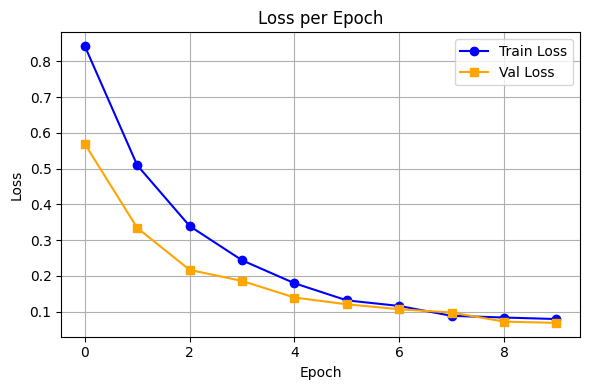

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(train_losses, label="Train Loss", marker='o', color='blue')
plt.plot(val_losses, label="Val Loss", marker='s', color='orange')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


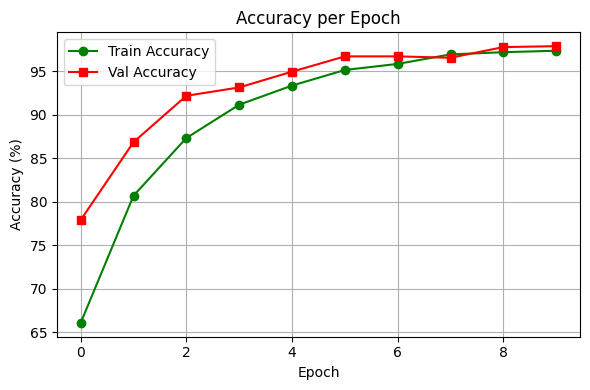

In [31]:
plt.figure(figsize=(6, 4))
plt.plot(train_accuracies, label="Train Accuracy", marker='o', color='green')
plt.plot(val_accuracies, label="Val Accuracy", marker='s', color='red')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Testing

In [32]:
# Load best model
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Calculate average test loss and accuracy
avg_test_loss = test_loss / len(test_loader.dataset)
test_accuracy = (correct / total) * 100

print(f"\n📊 Test Loss: {avg_test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.2f}%")


<ipython-input-32-357facbc091e>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))



📊 Test Loss: 0.0544
✅ Test Accuracy: 97.92%


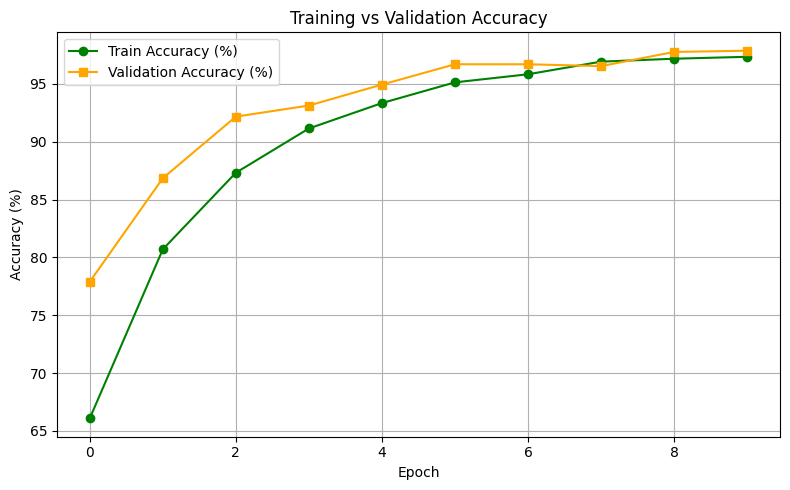

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, label="Train Accuracy (%)", marker='o', color='green')
plt.plot(val_accuracies, label="Validation Accuracy (%)", marker='s', color='orange')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Saving all the data

In [35]:
torch.save(model.state_dict(), "best_model.pth")


In [36]:
torch.save(model, "entire_model.pt")  # Includes architecture + weights


In [38]:
# Example from test phase
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 97.92%


In [40]:
import json

# Safe check: use empty lists if not defined
history = {
    "train_losses": train_losses if "train_losses" in locals() else [],
    "val_losses": val_losses if "val_losses" in locals() else [],
    "train_accuracies": train_accuracies if "train_accuracies" in locals() else [],
    "val_accuracies": val_accuracies if "val_accuracies" in locals() else [],
    "test_accuracy": test_accuracy
}

with open("metrics.json", "w") as f:
    json.dump(history, f)

print("✅ Saved all metrics to metrics.json")


✅ Saved all metrics to metrics.json


In [41]:
import torch
import matplotlib.pyplot as plt
import json
import os

# Make sure the best model and metrics exist
assert "best_model.pth" in os.listdir(), "❌ best_model.pth not found!"
assert "train_losses" in globals(), "❌ train_losses not defined. Run training first."
assert "val_losses" in globals(), "❌ val_losses not defined."
assert "train_accuracies" in globals(), "❌ train_accuracies not defined."
assert "val_accuracies" in globals(), "❌ val_accuracies not defined."
assert "test_accuracy" in globals(), "❌ test_accuracy not defined. Run testing first."

# 1. Save metrics to JSON
history = {
    "train_losses": train_losses,
    "val_losses": val_losses,
    "train_accuracies": train_accuracies,
    "val_accuracies": val_accuracies,
    "test_accuracy": test_accuracy
}

with open("metrics.json", "w") as f:
    json.dump(history, f)
print("✅ metrics.json saved.")

# 2. Save plots

# Loss Plot
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss", marker='o')
plt.plot(val_losses, label="Val Loss", marker='s')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("loss_plot.png")
plt.close()

# Accuracy Plot
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, label="Train Accuracy", marker='o')
plt.plot(val_accuracies, label="Val Accuracy", marker='s')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("accuracy_plot.png")
plt.close()

print("✅ loss_plot.png and accuracy_plot.png saved.")

# 3. Save model if not already saved
# (You already saved best_model.pth during training. But if needed, you can save again with a new name.)
torch.save(model.state_dict(), "final_model.pth")
print("✅ Model saved as final_model.pth")


✅ metrics.json saved.
✅ loss_plot.png and accuracy_plot.png saved.
✅ Model saved as final_model.pth
